In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from scipy.io import loadmat,savemat    
from sklearn.cross_validation import train_test_split 

D:\Users\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Measured values versus predicted values of m5 instrument in corn datase
Component: oil
RMSEP_lr: [ 0.01603872]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.167542906476
clf_Lasso.alpha_: 1.30146622478e-05  RMSEP_Lasso: [ 0.08136429]
Component: starch
RMSEP_lr: [ 0.10725331]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.72135206552
clf_Lasso.alpha_: 5.44030893066e-06  RMSEP_Lasso: [ 0.52641016]
Component: pro
RMSEP_lr: [ 0.04227059]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.451077874474
clf_Lasso.alpha_: 8.84082124609e-06  RMSEP_Lasso: [ 0.28202289]
Component: water
RMSEP_lr: [ 0.00477767]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.222965753991
clf_Lasso.alpha_: 1.2809344811e-05  RMSEP_Lasso: [ 0.18354207]


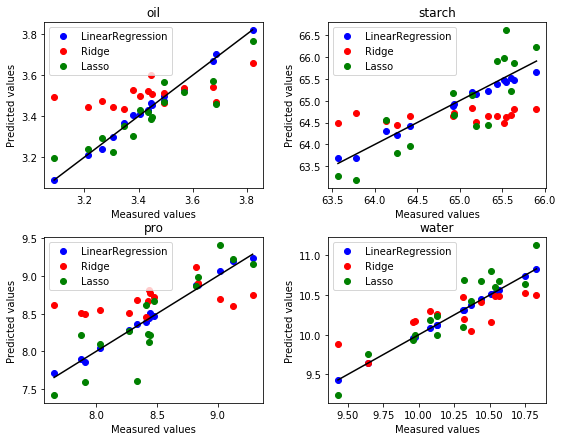

Measured values versus predicted values of mp5 instrument in corn datase
Component: oil
RMSEP_lr: [ 0.1057899]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.164199547032
clf_Lasso.alpha_: 9.17464004848e-06  RMSEP_Lasso: [ 0.07568476]
Component: starch
RMSEP_lr: [ 0.48753455]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.693999356489
clf_Lasso.alpha_: 4.40880649707e-06  RMSEP_Lasso: [ 0.74276698]
Component: pro
RMSEP_lr: [ 0.18965293]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.435509195478
clf_Lasso.alpha_: 8.56748060547e-06  RMSEP_Lasso: [ 0.4120354]
Component: water
RMSEP_lr: [ 0.23838668]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.242359237893
clf_Lasso.alpha_: 1.22009427258e-05  RMSEP_Lasso: [ 0.19549623]


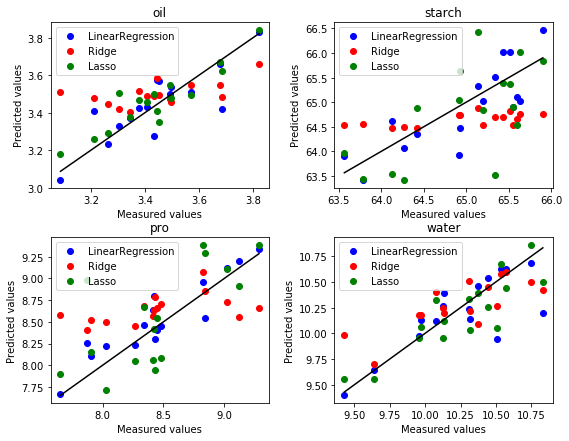

Measured values versus predicted values of mp6 instrument in corn datase
Component: oil
RMSEP_lr: [ 0.09164938]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.161800898786
clf_Lasso.alpha_: 6.96934836556e-06  RMSEP_Lasso: [ 0.08794092]
Component: starch
RMSEP_lr: [ 0.40007817]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.707962192576
clf_Lasso.alpha_: 4.544140354e-06  RMSEP_Lasso: [ 0.45018645]
Component: pro
RMSEP_lr: [ 0.18965224]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.445122495948
clf_Lasso.alpha_: 8.73754718066e-06  RMSEP_Lasso: [ 0.25082048]
Component: water
RMSEP_lr: [ 0.12905469]
clf_Ridge.alpha_: 0.1  RMSEP_Ridge[0]: 0.233896551407
clf_Lasso.alpha_: 1.2451097812e-05  RMSEP_Lasso: [ 0.15296491]


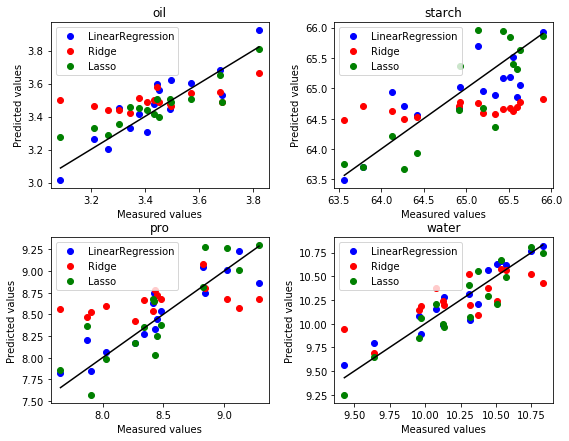

In [10]:
if __name__ == "__main__":     
 
    D = loadmat('E:\Documents\DAY\cornmat.mat')
    # print D.keys() 
    X = ('m5', 'mp5','mp6')
    Y = ('oil', 'starch', 'pro', 'water')
    
    for i in X:
        plt.figure(figsize=(9, 7))
        x = D[i]
        print "Measured values versus predicted values of",i,"instrument in corn datase"
        for j in range(4): 
            print "Component:",Y[j]
            y = D[Y[j]][:, 0:1]  

            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

            clf_lr = LinearRegression()
            clf_lr.fit(x_train, y_train)
            y_lr = clf_lr.predict(x_test)
            RMSEP_lr=np.sqrt(np.sum(np.square(np.subtract(y_lr,y_test)),axis=0)/y_test.shape[0])
            print "RMSEP_lr:",RMSEP_lr

            clf_Ridge = RidgeCV()
            clf_Ridge.fit(x_train, y_train)
            y_Ridge = clf_Ridge.predict(x_test)
            RMSEP_Ridge=np.sqrt(np.sum(np.square(np.subtract(y_Ridge,y_test)),axis=0)/y_test.shape[0])
            print "clf_Ridge.alpha_:",clf_Ridge.alpha_," RMSEP_Ridge[0]:", RMSEP_Ridge[0]

            clf_Lasso = LassoCV()
            clf_Lasso.fit(x_train, y_train.ravel())
            y_Lasso = clf_Lasso.predict(x_test).reshape(-1,1)
            RMSEP_Lasso=np.sqrt(np.sum(np.square(np.subtract(y_Lasso,y_test)),axis=0)/y_test.shape[0])
            print "clf_Lasso.alpha_:",clf_Lasso.alpha_," RMSEP_Lasso:", RMSEP_Lasso

            plt.subplot(2, 2, j+1)
            plt.plot(y_test, y_lr, 'bo', label='LinearRegression')
            plt.plot(y_test, y_Ridge, 'ro', label='Ridge')
            plt.plot(y_test, y_Lasso, 'go', label='Lasso')
            plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='black')

            plt.xlabel('Measured values')
            plt.ylabel('Predicted values')
            plt.legend(loc='upper left')
            plt.title(Y[j])

        plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
        plt.show()

